Install prerequisites and import appropriate functions

In [21]:
%pip install pandas matplotlib scikit-learn
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Read input CSV from the folder and print it to confirm successful read

In [22]:
df_pm = pd.read_csv('10-3-2023  -  13-55.csv',delimiter=',',header='infer')

In [23]:
df_pm

,DateTime,Fidas 200 PM2.5,SPS30 PM2.5,SEN55 PM2.5,HPMA115 PM2.5,NextPM PM2.5,SDS011 PM2.5
0,2023-3-10 13:55:2,0.27,0,8.8,16,0,0.7
1,2023-3-10 13:55:8,0.27,0,7.4,14,0,0.6
2,2023-3-10 13:55:14,0.27,0,5.1,14,0,0.6
3,2023-3-10 13:55:19,0.27,0,3.1,2,0,0.6
4,2023-3-10 13:55:25,0.27,0,2.1,2,0,0.5
...,...,...,...,...,...,...,...
44930,2023-3-13 11:49:3,1.08,0,0.8,1,0,0.8
44931,2023-3-13 11:49:8,1.08,0,0.7,1,0,0.9
44932,2023-3-13 11:49:14,1.08,0,0.7,1,0,0.8
44933,2023-3-13 11:49:19,1.08,0,0.8,1,0,0.9


Remove labels for not deployed sensors, convert the datetime characteristic into a pandas datetime characteristic

In [24]:
df_pm = df_pm.drop(['SPS30 PM2.5','NextPM PM2.5'], axis=1)
df_pm
df_pm['DateTime'] = pd.to_datetime(df_pm.DateTime)
deployed_sensors = ['SEN55 PM2.5', 'HPMA115 PM2.5','SDS011 PM2.5']
df_pm = df_pm.loc[~(df_pm[deployed_sensors] < 0).any(axis=1)]
df_pm

,DateTime,Fidas 200 PM2.5,SEN55 PM2.5,HPMA115 PM2.5,SDS011 PM2.5
0,2023-03-10 13:55:02,0.27,8.8,16,0.7
1,2023-03-10 13:55:08,0.27,7.4,14,0.6
2,2023-03-10 13:55:14,0.27,5.1,14,0.6
3,2023-03-10 13:55:19,0.27,3.1,2,0.6
4,2023-03-10 13:55:25,0.27,2.1,2,0.5
...,...,...,...,...,...
44930,2023-03-13 11:49:03,1.08,0.8,1,0.8
44931,2023-03-13 11:49:08,1.08,0.7,1,0.9
44932,2023-03-13 11:49:14,1.08,0.7,1,0.8
44933,2023-03-13 11:49:19,1.08,0.8,1,0.9


Plot the four mass concentrations alongside each other, add labels and legends

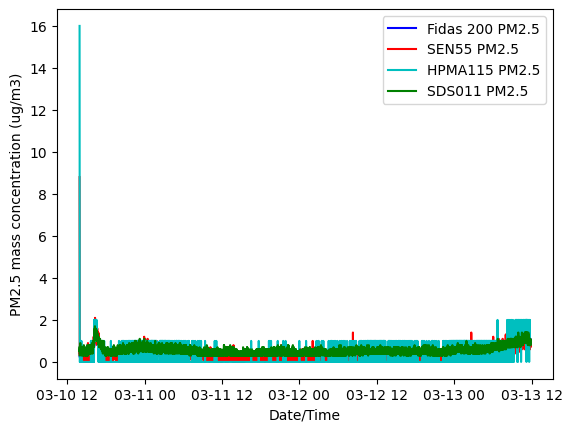

In [25]:
plt.plot(df_pm['DateTime'], df_pm['Fidas 200 PM2.5'], 'b-', df_pm['DateTime'], df_pm['SEN55 PM2.5'], 'r-', df_pm['DateTime'], df_pm['HPMA115 PM2.5'], 'c-', df_pm['DateTime'], df_pm['SDS011 PM2.5'], 'g-')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['Fidas 200 PM2.5', 'SEN55 PM2.5', 'HPMA115 PM2.5', 'SDS011 PM2.5'])
plt.show()

The startup of the sensors is presenting issues, drop the first 100 values and plot the four mass concentrations alongside each other, add labels and legends

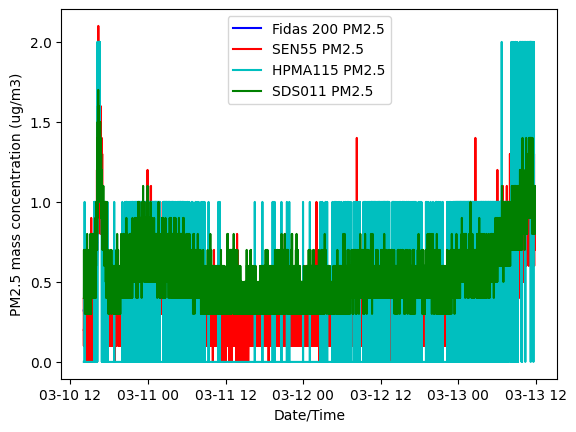

In [26]:
df_pm2 = df_pm.drop(range(0,100))
plt.plot(df_pm2['DateTime'], df_pm2['Fidas 200 PM2.5'], 'b-', df_pm2['DateTime'], df_pm2['SEN55 PM2.5'], 'r-', df_pm2['DateTime'], df_pm2['HPMA115 PM2.5'], 'c-', df_pm2['DateTime'], df_pm2['SDS011 PM2.5'], 'g-')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['Fidas 200 PM2.5', 'SEN55 PM2.5', 'HPMA115 PM2.5', 'SDS011 PM2.5'])
plt.show()

Calculate and print RMSE

In [27]:
from sklearn.metrics import mean_squared_error 
rmsesds = mean_squared_error(df_pm['Fidas 200 PM2.5'], df_pm['SDS011 PM2.5'], squared = False )
print(rmsesds)
rmsehpma = mean_squared_error(df_pm['Fidas 200 PM2.5'], df_pm['HPMA115 PM2.5'], squared = False )
print(rmsehpma)
rmsesen = mean_squared_error(df_pm['Fidas 200 PM2.5'], df_pm['SEN55 PM2.5'], squared = False )
print(rmsesen)


0.21215325794210685
0.36868357142482955
0.13857440780098645


Run moving average of sds data to try and improve data quality and plot against original data

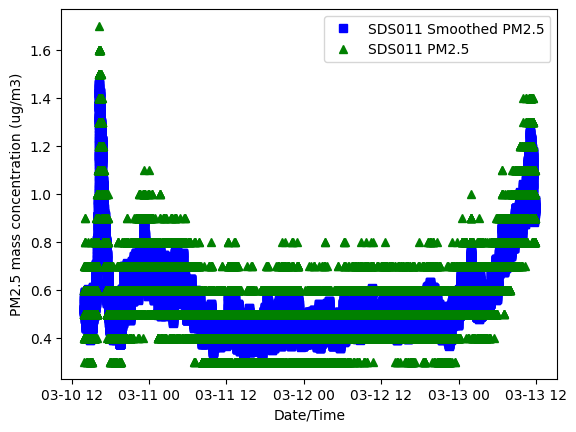

In [28]:
df_pm['SDS011 Smoothed PM2.5'] = df_pm['SDS011 PM2.5'].rolling(30).sum()/30
plt.plot(df_pm['DateTime'], df_pm['SDS011 Smoothed PM2.5'], 'bs', df_pm['DateTime'], df_pm['SDS011 PM2.5'], 'g^')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['SDS011 Smoothed PM2.5', 'SDS011 PM2.5'])
plt.show()

Plot smoothed SDS011 and FIDAS readings against each other

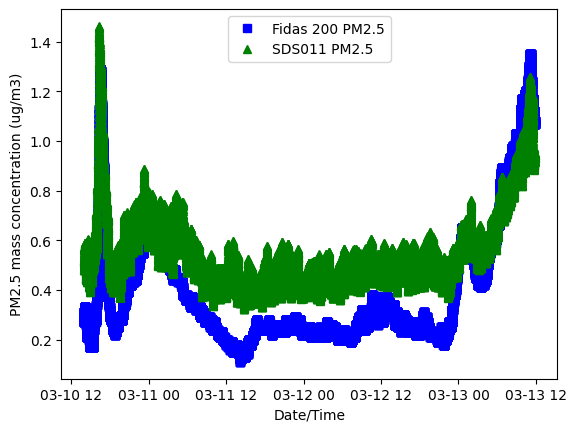

In [29]:
plt.plot(df_pm['DateTime'], df_pm['Fidas 200 PM2.5'], 'bs', df_pm['DateTime'], df_pm['SDS011 Smoothed PM2.5'], 'g^')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['Fidas 200 PM2.5', 'SDS011 PM2.5'])
plt.show()

Run moving average of SEN data to try and improve data quality and plot against original data

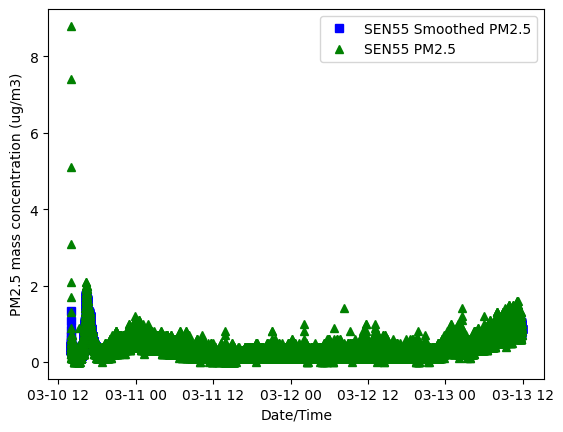

In [30]:
df_pm['SEN55 Smoothed PM2.5'] = df_pm['SEN55 PM2.5'].rolling(30).sum()/30
plt.plot(df_pm['DateTime'], df_pm['SEN55 Smoothed PM2.5'], 'bs', df_pm['DateTime'], df_pm['SEN55 PM2.5'], 'g^')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['SEN55 Smoothed PM2.5', 'SEN55 PM2.5'])
plt.show()

Plot smoothed SEN55 and FIDAS readings against each other

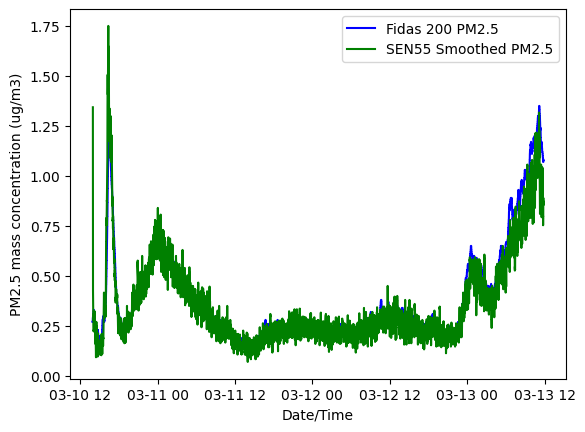

In [31]:
plt.plot(df_pm['DateTime'], df_pm['Fidas 200 PM2.5'], 'b-', df_pm['DateTime'], df_pm['SEN55 Smoothed PM2.5'], 'g-')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['Fidas 200 PM2.5', 'SEN55 Smoothed PM2.5'])
plt.show()

In [38]:
df_pm['Fidas 200 PM2.5'].describe()


count    44898.000000
mean         0.389111
std          0.242655
min          0.110000
25%          0.240000
50%          0.280000
75%          0.470000
max          1.350000
Name: Fidas 200 PM2.5, dtype: float64

Run moving average of HPMA data to try and improve data quality and plot against original data

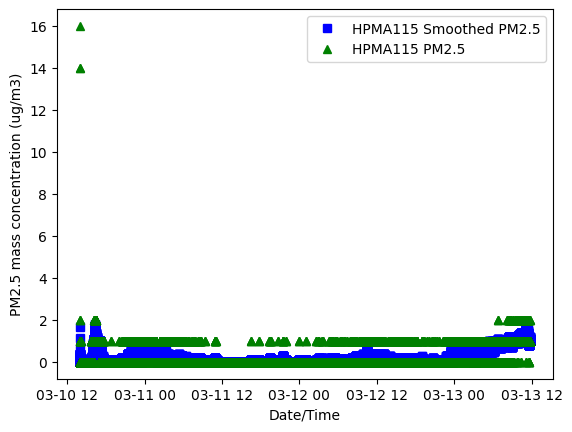

In [32]:
df_pm['HPMA115 Smoothed PM2.5'] = df_pm['HPMA115 PM2.5'].rolling(30).sum()/30
plt.plot(df_pm['DateTime'], df_pm['HPMA115 Smoothed PM2.5'], 'bs', df_pm['DateTime'], df_pm['HPMA115 PM2.5'], 'g^')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['HPMA115 Smoothed PM2.5', 'HPMA115 PM2.5'])
plt.show()

Plot smoothed HPMA and FIDAS readings against each other

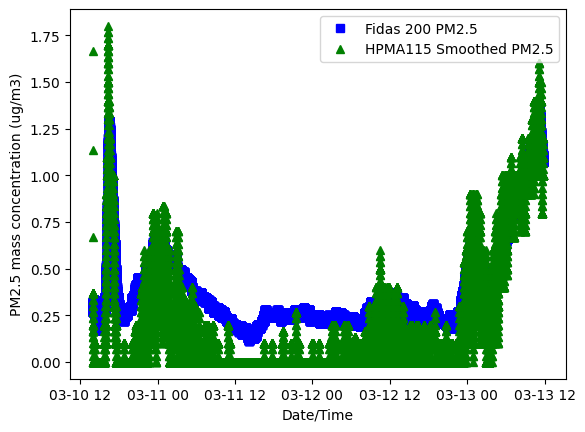

In [33]:
plt.plot(df_pm['DateTime'], df_pm['Fidas 200 PM2.5'], 'bs', df_pm['DateTime'], df_pm['HPMA115 Smoothed PM2.5'], 'g^')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['Fidas 200 PM2.5', 'HPMA115 Smoothed PM2.5'])
plt.show()

In [34]:
rmsesds = mean_squared_error(df_pm.dropna(axis=0, how='any')['Fidas 200 PM2.5'], df_pm.dropna(axis=0, how='any')['SDS011 Smoothed PM2.5'], squared = False )
print(rmsesds)
rmsehpma = mean_squared_error(df_pm.dropna(axis=0, how='any')['Fidas 200 PM2.5'], df_pm.dropna(axis=0, how='any')['HPMA115 Smoothed PM2.5'], squared = False )
print(rmsehpma)
rmsesen = mean_squared_error(df_pm.dropna(axis=0, how='any')['Fidas 200 PM2.5'], df_pm.dropna(axis=0, how='any')['SEN55 Smoothed PM2.5'], squared = False )
print(rmsesen)

0.19808832087271297
0.24229098924344367
0.08323355069685992


In [35]:
FIDASSEN552 = r2_score(df_pm.dropna(axis=0, how='any')['Fidas 200 PM2.5'], df_pm.dropna(axis=0, how='any')['SEN55 Smoothed PM2.5'])

print('FIDAS SEN55 R2 = ', FIDASSEN552)

FIDASHPMAR2 = r2_score(df_pm.dropna(axis=0, how='any')['Fidas 200 PM2.5'], df_pm.dropna(axis=0, how='any')['HPMA115 Smoothed PM2.5'])

print('FIDAS GPMA R2 = ', FIDASHPMAR2)

FIDASSDS011R2 = r2_score(df_pm.dropna(axis=0, how='any')['Fidas 200 PM2.5'], df_pm.dropna(axis=0, how='any')['SDS011 Smoothed PM2.5'])

print('FIDAS SDS011 R2 = ', FIDASSDS011R2)

FIDAS SEN55 R2 =  0.8823996033526308
FIDAS GPMA R2 =  0.0034789678091476928
FIDAS SDS011 R2 =  0.3339149529961801
